<a href="https://colab.research.google.com/github/dadakhalander/ml/blob/main/Final_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Used Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import scipy.stats as stats
from scipy.stats import shapiro


import warnings
warnings.filterwarnings('ignore')


# Numpy for numerical computtaions for large numbers
#Pandas for manipulation and analysis
# matplotlib for creaying static ,animated ans interactive visualization
#seaborn used for  par plot, voilin plot and nther visualization
# warning for to inform any problem with out stpping the program
#sklearn for machine learning algorithms



# Load and Read the Data


In [ ]:
### loadinf the .csv file into our notebook
data_frame = pd.read_csv("BerlinHousing4049.csv")

In [ ]:
data_frame.head()

,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,condition,grade,built,renovated,living_area_sqft
0,221900.0,3.0,1.0,1180.0,5650.0,1.0,3.0,7,1955.0,0,1340.0
1,538000.0,3.0,NaN,2570.0,7242.0,2.0,3.0,7,1951.0,1991,1690.0
2,180000.0,2.0,1.0,770.0,10000.0,1.0,3.0,6,1933.0,0,2720.0
3,604000.0,4.0,3.0,1960.0,5000.0,1.0,5.0,7,1965.0,0,1360.0
4,510000.0,3.0,2.0,1680.0,8080.0,1.0,3.0,8,1987.0,0,NaN


In [ ]:
data_frame.tail()

,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,condition,grade,built,renovated,living_area_sqft
9994,1695000.0,4.0,2.75,3770.0,10900.0,2.0,5.0,9,1924.0,0,3000.0
9995,279000.0,2.0,1.00,1020.0,47044.0,1.0,5.0,7,1904.0,1958,1930.0
9996,262000.0,3.0,1.50,1700.0,9579.0,1.0,4.0,7,1962.0,0,1700.0
9997,533000.0,4.0,1.00,1550.0,4750.0,1.5,3.0,7,1919.0,0,1320.0
9998,640000.0,3.0,1.75,1680.0,8100.0,1.0,3.0,8,1950.0,0,1880.0


# EDA(Explorartory Data Analysis)

In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             9990 non-null   float64
 1   bedrooms          9988 non-null   float64
 2   bathrooms         9990 non-null   float64
 3   sqft_living       9992 non-null   float64
 4   sqft_total        9994 non-null   float64
 5   floors            9999 non-null   float64
 6   condition         9998 non-null   float64
 7   grade             9999 non-null   int64  
 8   built             9996 non-null   float64
 9   renovated         9999 non-null   int64  
 10  living_area_sqft  9988 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 859.4 KB


In [ ]:
data_frame.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_total', 'floors',
       'condition', 'grade', 'built', 'renovated', 'living_area_sqft'],
      dtype='object')

In [ ]:
data_frame.shape

(9999, 11)

In [ ]:
data_frame.head()

,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,condition,grade,built,renovated,living_area_sqft
0,221900.0,3.0,1.0,1180.0,5650.0,1.0,3.0,7,1955.0,0,1340.0
1,538000.0,3.0,NaN,2570.0,7242.0,2.0,3.0,7,1951.0,1991,1690.0
2,180000.0,2.0,1.0,770.0,10000.0,1.0,3.0,6,1933.0,0,2720.0
3,604000.0,4.0,3.0,1960.0,5000.0,1.0,5.0,7,1965.0,0,1360.0
4,510000.0,3.0,2.0,1680.0,8080.0,1.0,3.0,8,1987.0,0,NaN


In [ ]:
data_frame.tail()

,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,condition,grade,built,renovated,living_area_sqft
9994,1695000.0,4.0,2.75,3770.0,10900.0,2.0,5.0,9,1924.0,0,3000.0
9995,279000.0,2.0,1.00,1020.0,47044.0,1.0,5.0,7,1904.0,1958,1930.0
9996,262000.0,3.0,1.50,1700.0,9579.0,1.0,4.0,7,1962.0,0,1700.0
9997,533000.0,4.0,1.00,1550.0,4750.0,1.5,3.0,7,1919.0,0,1320.0
9998,640000.0,3.0,1.75,1680.0,8100.0,1.0,3.0,8,1950.0,0,1880.0


In [ ]:
data_frame.describe().T

,count,mean,std,min,25%,50%,75%,max
price,9990.0,533329.214815,376887.993684,75000.0,315000.0,445819.0,639800.0,7700000.0
bedrooms,9988.0,3.364638,0.910976,1.0,3.0,3.0,4.0,11.0
bathrooms,9990.0,2.063263,0.765275,0.5,1.5,2.0,2.5,8.0
sqft_living,9992.0,2053.107186,911.422552,380.0,1410.0,1890.0,2500.0,12050.0
sqft_total,9994.0,16040.719832,45054.200850,572.0,5425.5,7916.5,11179.0,1651359.0
floors,9999.0,1.432043,0.511869,1.0,1.0,1.0,2.0,3.5
condition,9998.0,3.446389,0.666341,1.0,3.0,3.0,4.0,5.0
grade,9999.0,7.594459,1.165901,3.0,7.0,7.0,8.0,13.0
built,9996.0,1967.267307,27.988813,1900.0,1950.0,1969.0,1990.0,2015.0
renovated,9999.0,91.642364,417.830430,0.0,0.0,0.0,0.0,2015.0


# Check for Duplicates

In [ ]:
data_frame.duplicated().sum()

2

In [ ]:
data_frame.drop_duplicates(inplace=True)

In [ ]:
data_frame.duplicated().sum()

0

In [ ]:
data_frame.drop_duplicates()

,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,condition,grade,built,renovated,living_area_sqft
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,3.0,7,1955.0,0,1340.0
1,538000.0,3.0,NaN,2570.0,7242.0,2.0,3.0,7,1951.0,1991,1690.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,3.0,6,1933.0,0,2720.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,5.0,7,1965.0,0,1360.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,3.0,8,1987.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9994,1695000.0,4.0,2.75,3770.0,10900.0,2.0,5.0,9,1924.0,0,3000.0
9995,279000.0,2.0,1.00,1020.0,47044.0,1.0,5.0,7,1904.0,1958,1930.0
9996,262000.0,3.0,1.50,1700.0,9579.0,1.0,4.0,7,1962.0,0,1700.0
9997,533000.0,4.0,1.00,1550.0,4750.0,1.5,3.0,7,1919.0,0,1320.0


#  Handling Missing Values and transform data

In [ ]:
# checking missing values
data_frame.isnull().sum()


,0
price,9
bedrooms,11
bathrooms,9
sqft_living,7
sqft_total,5
floors,0
condition,1
grade,0
built,3
renovated,0


In [ ]:
#  remove all null values using for loop

for col in ['sqft_living','sqft_total', 'bathrooms','built','condition','living_area_sqft', 'bedrooms', 'price']:
    data_frame[col].fillna(data_frame[col].median(), inplace=True)

In [ ]:
data_frame.isnull().sum()

,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_total,0
floors,0
condition,0
grade,0
built,0
renovated,0


In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9997 entries, 0 to 9998
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             9997 non-null   float64
 1   bedrooms          9997 non-null   float64
 2   bathrooms         9997 non-null   float64
 3   sqft_living       9997 non-null   float64
 4   sqft_total        9997 non-null   float64
 5   floors            9997 non-null   float64
 6   condition         9997 non-null   float64
 7   grade             9997 non-null   int64  
 8   built             9997 non-null   float64
 9   renovated         9997 non-null   int64  
 10  living_area_sqft  9997 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 937.2 KB


# Assign dataframe to df

In [ ]:

df = data_frame.assign(
    condition=pd.to_numeric(data_frame['condition'], errors='coerce').astype('int64'),
    bedrooms=pd.to_numeric(data_frame['bedrooms'], errors='coerce').astype('int64'),
    bathrooms=pd.to_numeric(data_frame['bathrooms'], errors='coerce').astype('int64'),
    floors=pd.to_numeric(data_frame['floors'], errors='coerce').astype('int64')
)




In [ ]:
# changing build and renovated into datetime column
df['built'] = pd.to_datetime(data_frame['built'], format='%Y', errors='coerce')
df[' renovated'] = pd.to_datetime(data_frame['renovated'], format='%Y', errors='coerce')


In [ ]:
# If 'renovated' is NaT (not renovated), replace it with 'built' year
df['renovated'].fillna(data_frame['built'], inplace=True)



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9997 entries, 0 to 9998
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             9997 non-null   float64       
 1   bedrooms          9997 non-null   int64         
 2   bathrooms         9997 non-null   int64         
 3   sqft_living       9997 non-null   float64       
 4   sqft_total        9997 non-null   float64       
 5   floors            9997 non-null   int64         
 6   condition         9997 non-null   int64         
 7   grade             9997 non-null   int64         
 8   built             9997 non-null   datetime64[ns]
 9   renovated         9997 non-null   int64         
 10  living_area_sqft  9997 non-null   float64       
 11   renovated        458 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(4), int64(6)
memory usage: 1015.3 KB


In [ ]:
#  change sqft into meters and store in new column

# Assuming 'sqft_living' is the column containing square footage
df['sqmt_living_m2'] = data_frame['sqft_living'] * 0.092903
df['sqmt_total_m2'] = data_frame['sqft_total'] * 0.092903
df['living_area_sqmt_m2'] = data_frame['living_area_sqft'] * 0.092903

In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9997 entries, 0 to 9998
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             9997 non-null   float64
 1   bedrooms          9997 non-null   float64
 2   bathrooms         9997 non-null   float64
 3   sqft_living       9997 non-null   float64
 4   sqft_total        9997 non-null   float64
 5   floors            9997 non-null   float64
 6   condition         9997 non-null   float64
 7   grade             9997 non-null   int64  
 8   built             9997 non-null   float64
 9   renovated         9997 non-null   int64  
 10  living_area_sqft  9997 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 937.2 KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9997 entries, 0 to 9998
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   price                9997 non-null   float64       
 1   bedrooms             9997 non-null   int64         
 2   bathrooms            9997 non-null   int64         
 3   sqft_living          9997 non-null   float64       
 4   sqft_total           9997 non-null   float64       
 5   floors               9997 non-null   int64         
 6   condition            9997 non-null   int64         
 7   grade                9997 non-null   int64         
 8   built                9997 non-null   datetime64[ns]
 9   renovated            9997 non-null   int64         
 10  living_area_sqft     9997 non-null   float64       
 11   renovated           458 non-null    datetime64[ns]
 12  sqmt_living_m2       9997 non-null   float64       
 13  sqmt_total_m2        9997 non-null   f

In [ ]:
#drop the columns
columns_to_drop = ['sqft_living', 'sqft_total', 'living_area_sqft']
df = df.drop(columns=columns_to_drop)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9997 entries, 0 to 9998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   price                9997 non-null   float64       
 1   bedrooms             9997 non-null   int64         
 2   bathrooms            9997 non-null   int64         
 3   floors               9997 non-null   int64         
 4   condition            9997 non-null   int64         
 5   grade                9997 non-null   int64         
 6   built                9997 non-null   datetime64[ns]
 7   renovated            9997 non-null   int64         
 8    renovated           458 non-null    datetime64[ns]
 9   sqmt_living_m2       9997 non-null   float64       
 10  sqmt_total_m2        9997 non-null   float64       
 11  living_area_sqmt_m2  9997 non-null   float64       
dtypes: datetime64[ns](2), float64(4), int64(6)
memory usage: 1015.3 KB


# Understand Data Distribution

In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
price,9997.0,533276.110533,75000.0,315000.0,445819.0,639500.0,7700000.0,376755.194472
bedrooms,9997.0,3.364309,1.0,3.0,3.0,4.0,11.0,0.910522
bathrooms,9997.0,1.705312,0.0,1.0,2.0,2.0,8.0,0.727459
floors,9997.0,1.380514,1.0,1.0,1.0,2.0,3.0,0.520539
condition,9997.0,3.446334,1.0,3.0,3.0,4.0,5.0,0.666351
grade,9997.0,7.594278,3.0,7.0,7.0,8.0,13.0,1.165926
built,9997,1967-04-08 14:28:26.191857552,1900-01-01 00:00:00,1950-01-01 00:00:00,1969-01-01 00:00:00,1990-01-01 00:00:00,2015-01-01 00:00:00,NaN
renovated,9997.0,91.462639,0.0,0.0,0.0,0.0,2015.0,417.444121
renovated,458,1996-05-27 03:36:56.593886464,1940-01-01 00:00:00,1988-01-01 00:00:00,2000-01-01 00:00:00,2009-01-01 00:00:00,2015-01-01 00:00:00,NaN
sqmt_living_m2,9997.0,190.735026,35.30314,130.99323,175.58667,232.2575,1119.48115,84.648081


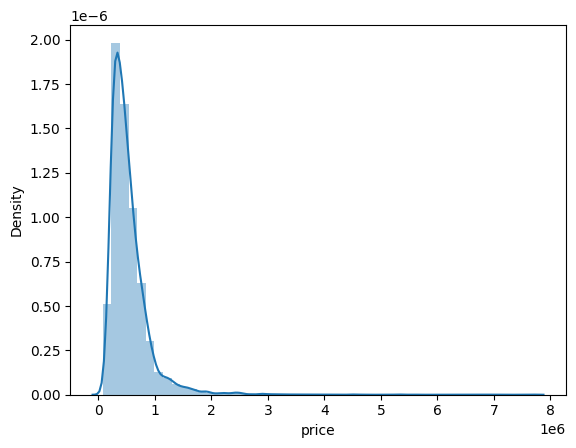

In [ ]:
sns.distplot(df['price'])
plt.show()

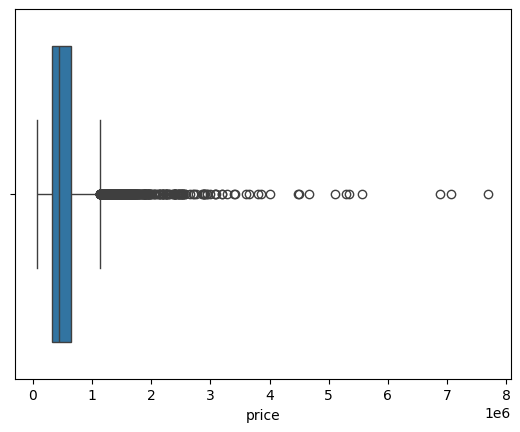

In [ ]:
sns.boxplot(x=df['price'])
plt.show()

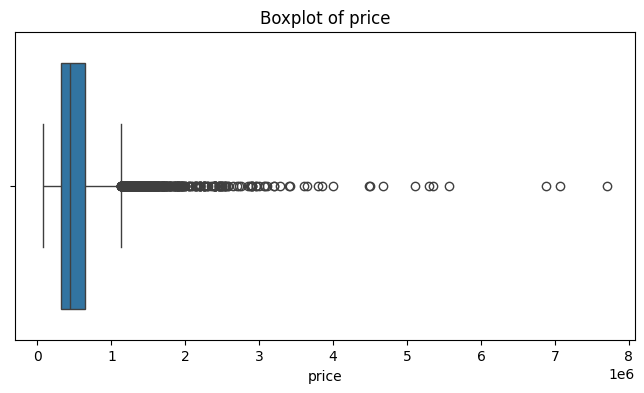

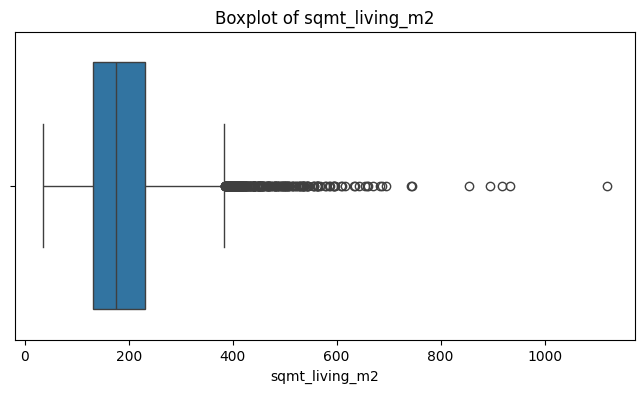

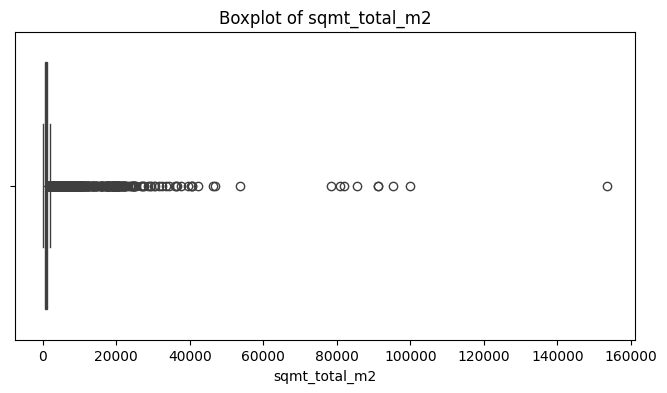

In [ ]:
# Boxplots
import matplotlib.pyplot as plt
import seaborn as sns

for column in ['price', 'sqmt_living_m2', 'sqmt_total_m2']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=column)
    plt.title(f'Boxplot of {column}')
    plt.show()
    plt.show()

# Outliers Detection

In [ ]:
skew_value = df['price'].skew()

print("Skewness of the price data:", skew_value)

Skewness of the price data: 5.010958666476251


In [ ]:
#  want to find outliers in the 'price' column.
#  Using IQR (Interquartile Range)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
#This line creates a subset of the DataFrame (df) called outliers_iqr.
#It filters the rows where the price is either below the lower_bound or
#above the upper_bound.
outliers_iqr

,price,bedrooms,bathrooms,floors,condition,grade,built,renovated,renovated,sqmt_living_m2,sqmt_total_m2,living_area_sqmt_m2
5,1225000.0,4,4,1,3,11,2001-01-01,0,NaT,503.534260,9469.602790,442.21828
21,2000000.0,3,2,1,3,9,1968-01-01,0,NaT,283.354150,4168.278901,381.83133
49,1350000.0,3,2,1,5,9,1953-01-01,0,NaT,255.761959,6039.159515,248.98004
69,1325000.0,5,2,1,3,8,1965-01-01,0,NaT,297.289600,1872.738674,314.94117
125,1450000.0,4,2,1,3,8,1914-01-01,1992,1992-01-01,255.483250,1652.651467,284.28318
...,...,...,...,...,...,...,...,...,...,...,...,...
9925,1200000.0,4,2,2,5,8,1967-01-01,0,NaT,215.534960,1218.329942,254.55422
9935,1275000.0,4,2,1,4,10,1970-01-01,0,NaT,264.773550,730.310483,261.05743
9945,1150000.0,6,3,2,3,9,1984-01-01,0,NaT,379.973270,4602.600426,276.85094
9954,1250000.0,5,5,2,3,10,2000-01-01,0,NaT,464.515000,3057.344827,281.49609


In [ ]:
# Create a new DataFrame without the outliers
df_no_outliers = df[~df.index.isin(outliers_iqr.index)]


In [ ]:
df.shape

(9497, 19)

<Axes: xlabel='price'>

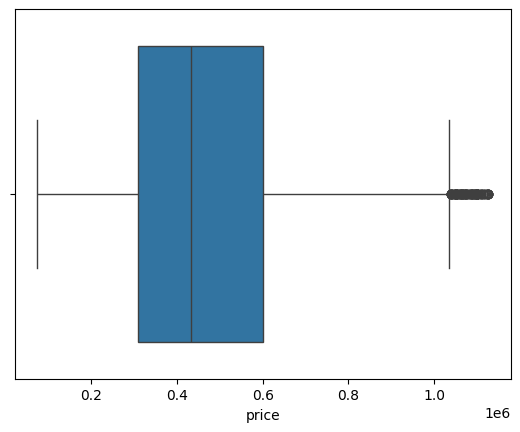

In [ ]:
#You can also visualize the data after outlier removal:
sns.boxplot(x=df_no_outliers['price'])

<Axes: xlabel='price', ylabel='Density'>

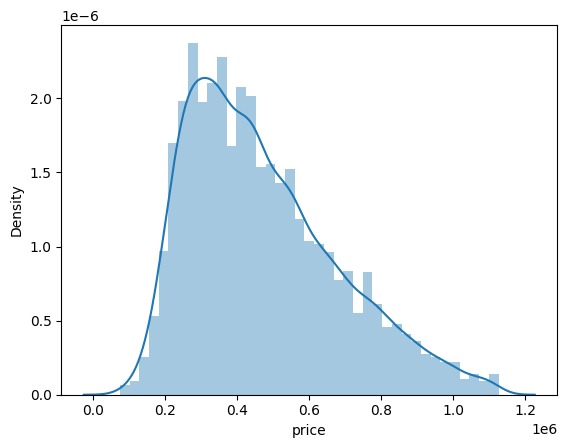

In [ ]:
sns.distplot(df_no_outliers['price'])

In [ ]:
df=df_no_outliers
# update df_n0_outliers to my df

In [ ]:
df.shape

(9497, 12)

In [ ]:
# now we got new shape after removing outliers so check for relation of new data
df.describe().T

,count,mean,min,25%,50%,75%,max,std
price,9497.0,472431.863431,75000.0,309000.0,433000.0,600000.0,1126000.0,208601.464137
bedrooms,9497.0,3.327051,1.0,3.0,3.0,4.0,11.0,0.89592
bathrooms,9497.0,1.647889,0.0,1.0,2.0,2.0,7.0,0.66699
floors,9497.0,1.36222,1.0,1.0,1.0,2.0,3.0,0.514528
condition,9497.0,3.443087,1.0,3.0,3.0,4.0,5.0,0.663583
grade,9497.0,7.473413,3.0,7.0,7.0,8.0,12.0,1.03037
built,9497,1967-02-12 16:46:02.640833936,1900-01-01 00:00:00,1950-01-01 00:00:00,1969-01-01 00:00:00,1990-01-01 00:00:00,2015-01-01 00:00:00,NaN
renovated,9497.0,79.857745,0.0,0.0,0.0,0.0,2015.0,391.191747
renovated,380,1995-10-25 04:13:53.684210560,1940-01-01 00:00:00,1986-01-01 00:00:00,2000-01-01 00:00:00,2010-01-01 00:00:00,2015-01-01 00:00:00,NaN
sqmt_living_m2,9497.0,181.57077,35.30314,129.13517,170.94152,222.9672,694.91444,71.489877


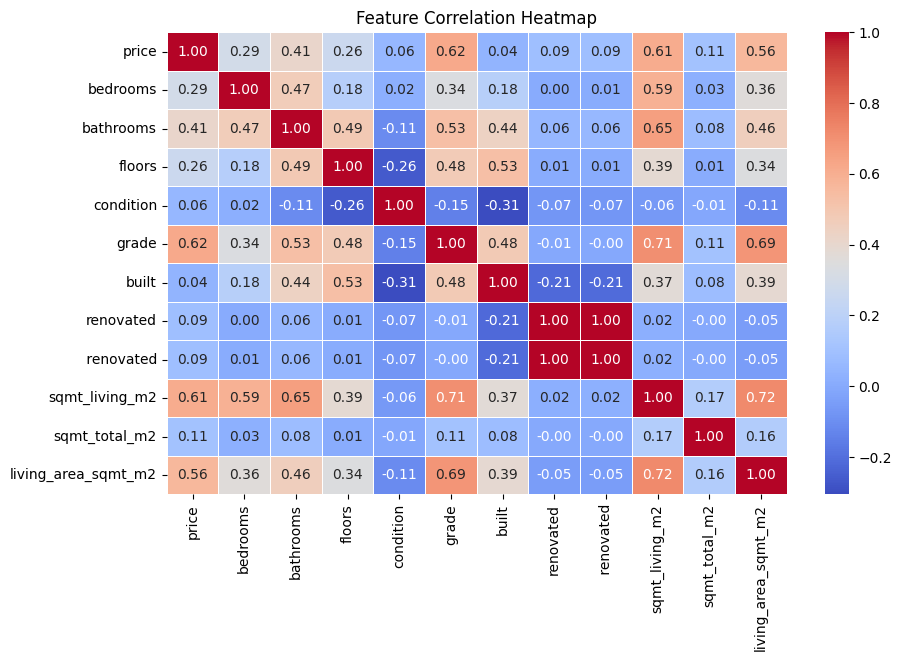

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
corr1 = df.corr()
price_correlation = corr1['price'].sort_values(ascending=False)
print(price_correlation)

price                  1.000000
grade                  0.621458
sqmt_living_m2         0.611894
living_area_sqmt_m2    0.564079
bathrooms              0.410940
bedrooms               0.294709
floors                 0.263005
sqmt_total_m2          0.105972
 renovated             0.090072
renovated              0.088106
condition              0.055702
built                  0.038763
Name: price, dtype: float64


# Skewness Metric and Log transformation

In [ ]:
skew_value = df['price'].skew()

print("Skewness of the price data:", skew_value)

Skewness of the price data: 0.7603786423183093


In [ ]:
# Apply log transformation to the 'price' column
df['log-price'] = np.log1p(df['price'])

In [ ]:
df.head(1).T

,0
price,221900.0
bedrooms,3
bathrooms,1
floors,1
condition,3
grade,7
built,1955-01-01 00:00:00
renovated,0
renovated,NaT
sqmt_living_m2,109.62554


In [ ]:
# Now you have a new column 'price_log' with the log-transformed prices.
# You can use this column in your analysis or modeling instead of 'price'.
#  Check the skewness of the transformed data
skew_value_log = df['log-price'].skew()
print("Skewness of the new logged-transformed data:", skew_value_log)

Skewness of the new logged-transformed data: -0.15366126832875765


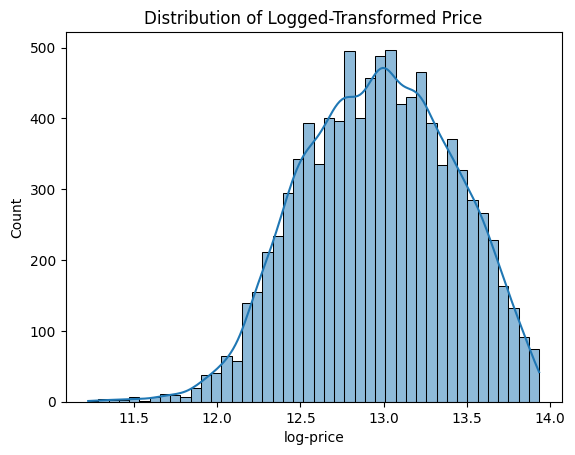

In [ ]:
# Visualize the distribution of the log-transformed price
sns.histplot(df['log-price'], kde=True)
plt.title('Distribution of Logged-Transformed Price')
plt.show()

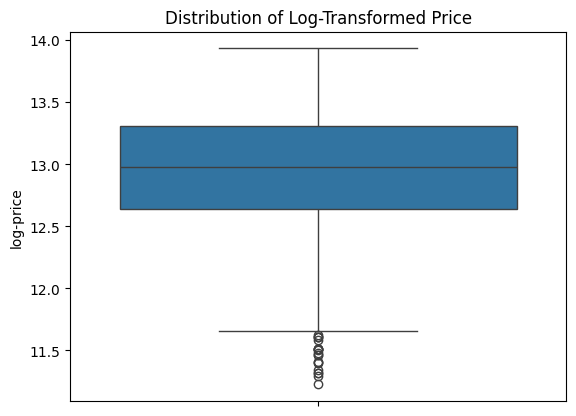

In [ ]:
# Visualize the distribution of the log-transformed price
sns.boxplot(df['log-price'])
plt.title('Distribution of Log-Transformed Price')
plt.show()

# Square Root Transformation

In [ ]:
# Apply square root transformation
df['price_sqrt'] = np.sqrt(df['price'])


In [ ]:
# Now you have a new column 'price_log' with the log-transformed prices.
# You can use this column in your analysis or modeling instead of 'price'.
#  Check the skewness of the transformed data
skew_value_sqrt = df['price_sqrt'].skew()
print("Skewness of the new sqrt-transformed data:", skew_value_sqrt)

Skewness of the new sqrt-transformed data: 0.3261727400667919


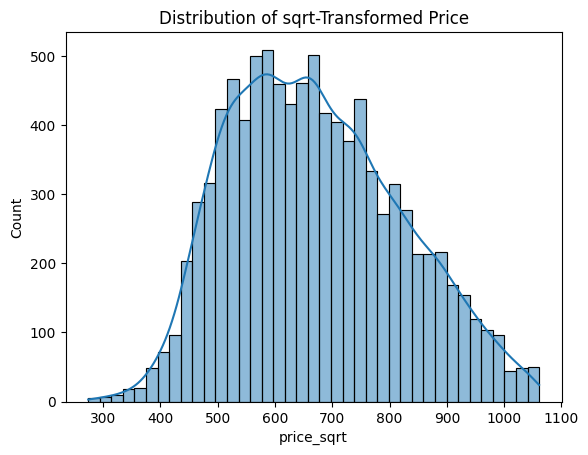

In [ ]:
# Visualize the distribution of the sqrt-transformed price
sns.histplot(df['price_sqrt'], kde=True)
plt.title('Distribution of sqrt-Transformed Price')
plt.show()

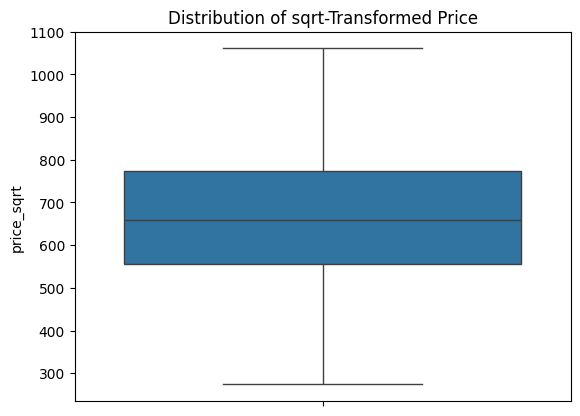

In [ ]:
# Visualize the distribution of the sqrt-transformed price
sns.boxplot(df['price_sqrt'])
plt.title('Distribution of sqrt-Transformed Price')
plt.show()

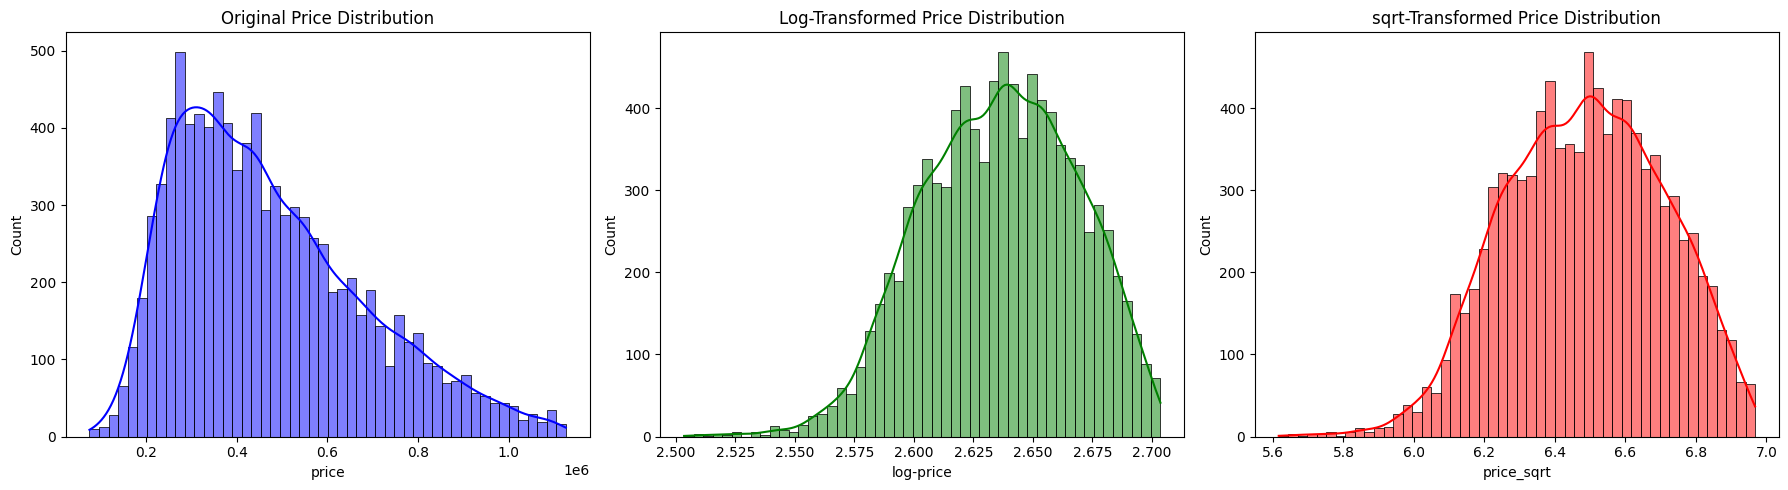

In [ ]:
plt.figure(figsize=(18, 5)) # Adjusted figure size for better layout

# Original Price Distribution
plt.subplot(1, 3, 1) # Changed layout to 1 row, 3 columns
sns.histplot(df['price'], bins=50, kde=True, color='blue')
plt.title("Original Price Distribution")

# Log-transformed Price Distribution
plt.subplot(1, 3, 2) # Changed layout to 1 row, 3 columns
sns.histplot(df['log-price'].apply(lambda x: np.log1p(x)), bins=50, kde=True, color='green')
plt.title("Log-Transformed Price Distribution")


# sqrt-transformed Price Distribution
plt.subplot(1, 3, 3) # Changed layout to 1 row, 3 columns
sns.histplot(df['price_sqrt'].apply(lambda x: np.log1p(x)), bins=50, kde=True, color='red')
plt.title("sqrt-Transformed Price Distribution")


plt.tight_layout()
plt.show()

# Normalization And Standardization

In [ ]:
# numerical columns for normalization (excluding categorical columns)
numerical_features = ["price", "sqmt_living_m2", "sqmt_total_m2"]

In [ ]:
#Min-Max Scaling (Normalization between 0 and 1)
min_max_scaler = MinMaxScaler()
df_minmax = df.copy()
df_minmax[numerical_features] = min_max_scaler.fit_transform(df_minmax[numerical_features])

In [ ]:
#  Apply Standardization (Mean = 0, Std Dev = 1)
standard_scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[numerical_features] = standard_scaler.fit_transform(df_standardized[numerical_features])


In [ ]:
#  Compare Summary Statistics Before and After Normalization
print("Original Data Summary:\n", df[numerical_features].describe())
print("\nMin-Max Scaled Data Summary:\n", df_minmax[numerical_features].describe())
print("\nStandardized Data Summary:\n", df_standardized[numerical_features].describe())

Original Data Summary:
               price  sqmt_living_m2  sqmt_total_m2
count  9.497000e+03     9497.000000    9497.000000
mean   4.724319e+05      181.570770    1445.085832
std    2.086015e+05       71.489877    4039.266722
min    7.500000e+04       35.303140      53.140516
25%    3.090000e+05      129.135170     498.703304
50%    4.330000e+05      170.941520     724.643400
75%    6.000000e+05      222.967200    1003.352400
max    1.126000e+06      694.914440  153416.205177

Min-Max Scaled Data Summary:
              price  sqmt_living_m2  sqmt_total_m2
count  9497.000000     9497.000000    9497.000000
mean      0.378146        0.221748       0.009076
std       0.198479        0.108382       0.026338
min       0.000000        0.000000       0.000000
25%       0.222645        0.142254       0.002905
50%       0.340628        0.205634       0.004379
75%       0.499524        0.284507       0.006196
max       1.000000        1.000000       1.000000

Standardized Data Summary:
        

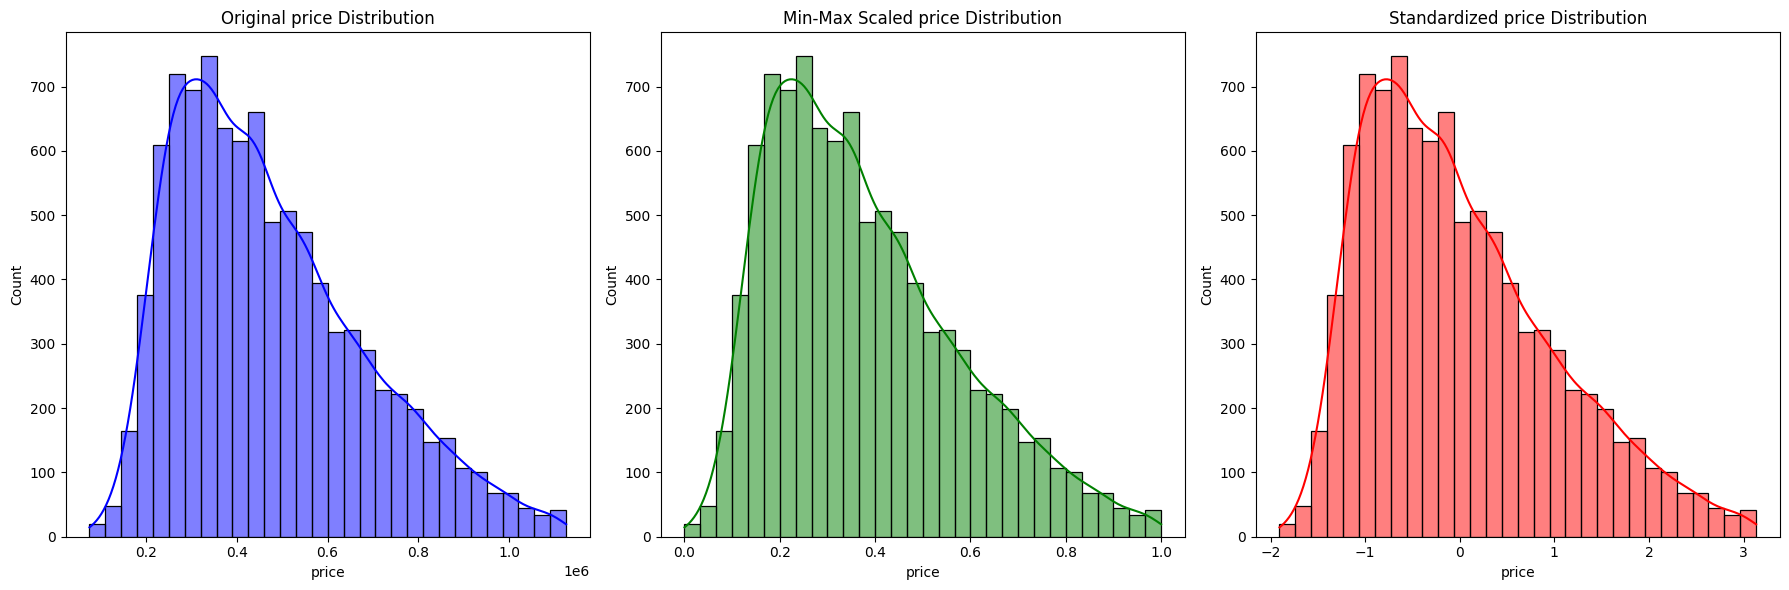

In [ ]:
#  Visualizing the Impact of Normalization

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot Original Data
sns.histplot(df[numerical_features[0]], kde=True, ax=axes[0], color='blue', bins=30)
axes[0].set_title(f"Original {numerical_features[0]} Distribution")

# Plot Min-Max Scaled Data
sns.histplot(df_minmax[numerical_features[0]], kde=True, ax=axes[1], color='green', bins=30)
axes[1].set_title(f"Min-Max Scaled {numerical_features[0]} Distribution")

# Plot Standardized Data
sns.histplot(df_standardized[numerical_features[0]], kde=True, ax=axes[2], color='red', bins=30)
axes[2].set_title(f"Standardized {numerical_features[0]} Distribution")

plt.tight_layout()
plt.show()

In [ ]:
# matrix for the original data
correlation_original = df[numerical_features].corr()

# matrix for the normalisaiton  data
correlation_minmax = df_minmax[numerical_features].corr()

# matrix for the standardized data
correlation_standardized = df_standardized[numerical_features].corr()

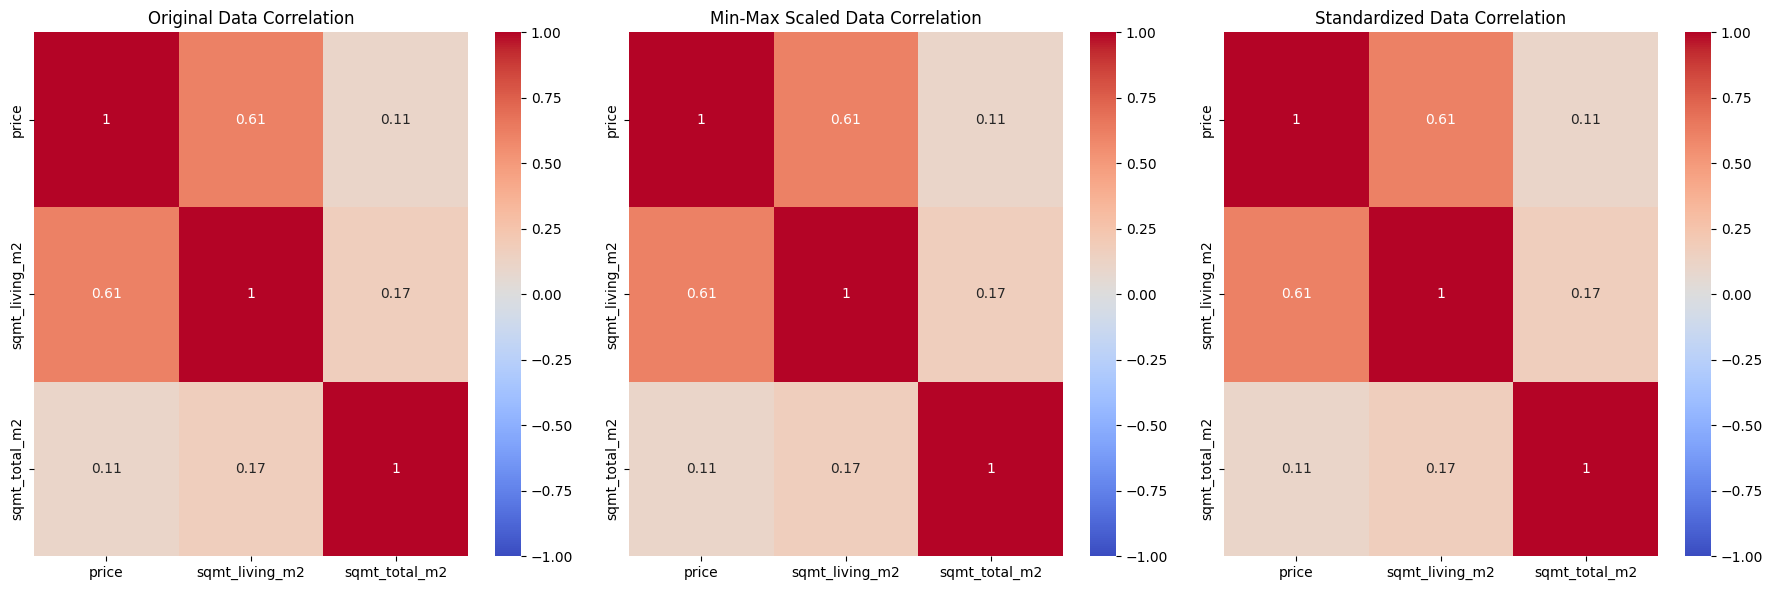

In [ ]:
# Set up the figure for the heatmaps
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

#  Original Data Correlation
sns.heatmap(correlation_original, annot=True, cmap='coolwarm', ax=axes[0], vmin=-1, vmax=1)
axes[0].set_title("Original Data Correlation")

#  MNormalisation  Data Correlation
sns.heatmap(correlation_minmax, annot=True, cmap='coolwarm', ax=axes[1], vmin=-1, vmax=1)
axes[1].set_title("Min-Max Scaled Data Correlation")

# Standardized Data Correlation
sns.heatmap(correlation_standardized, annot=True, cmap='coolwarm', ax=axes[2], vmin=-1, vmax=1)
axes[2].set_title("Standardized Data Correlation")

plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import shapiro
stat, p_value = shapiro(df['price'])
print(f"Shapiro-Wilk Test p-value: {p_value}")

Shapiro-Wilk Test p-value: 3.7636178878629676e-49


# price and total square foot variables

In [ ]:
df['log_sqft_total'] = np.log1p(df['sqmt_total_m2'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9497 entries, 0 to 9998
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   price                9497 non-null   float64       
 1   bedrooms             9497 non-null   int64         
 2   bathrooms            9497 non-null   int64         
 3   floors               9497 non-null   int64         
 4   condition            9497 non-null   int64         
 5   grade                9497 non-null   int64         
 6   built                9497 non-null   datetime64[ns]
 7   renovated            9497 non-null   int64         
 8    renovated           380 non-null    datetime64[ns]
 9   sqmt_living_m2       9497 non-null   float64       
 10  sqmt_total_m2        9497 non-null   float64       
 11  living_area_sqmt_m2  9497 non-null   float64       
 12  log-price            9497 non-null   float64       
 13  price_sqrt           9497 non-null   f

In [ ]:
import scipy.stats as stats

corr2 = df[['price', 'sqmt_total_m2']].corr().iloc[0, 1]
print(f"Correlation between price and total square footage: {corr2:.2f}")

Correlation between price and total square footage: 0.11


In [ ]:
# Set plot style
sns.set_style("whitegrid")

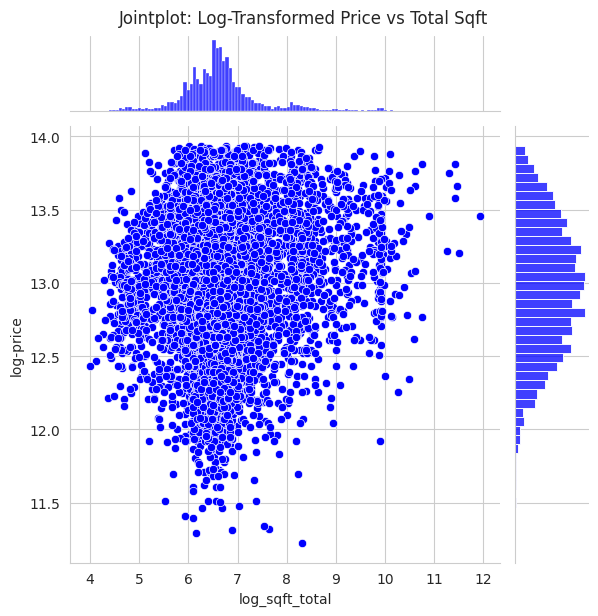

In [ ]:
# 3. Jointplot (Price vs Total Sqft with Distribution)
sns.jointplot(x='log_sqft_total', y='log-price', data=df, kind='scatter', color='blue')
plt.suptitle("Jointplot: Log-Transformed Price vs Total Sqft", y=1.02)
plt.show()

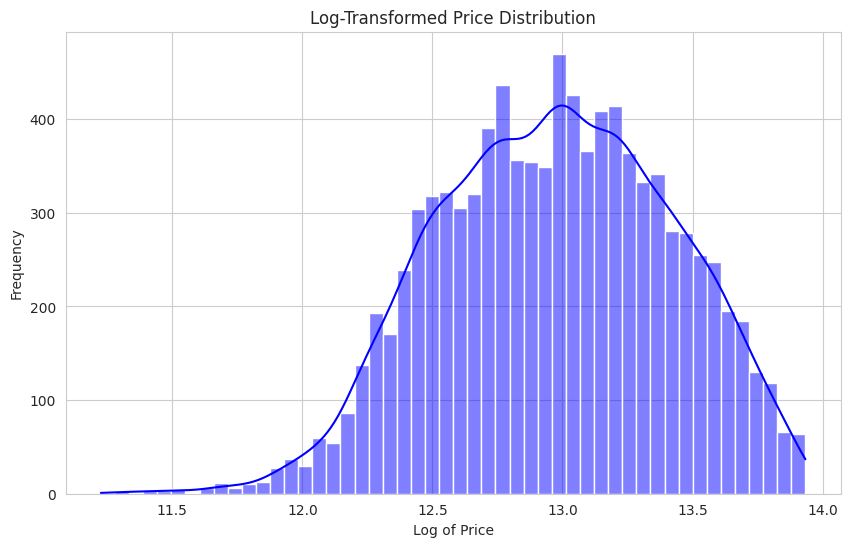

In [ ]:
# 4. Histogram for Log-Transformed Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['log-price'], kde=True, color='blue', bins=50)
plt.title("Log-Transformed Price Distribution")
plt.xlabel("Log of Price")
plt.ylabel("Frequency")
plt.show()

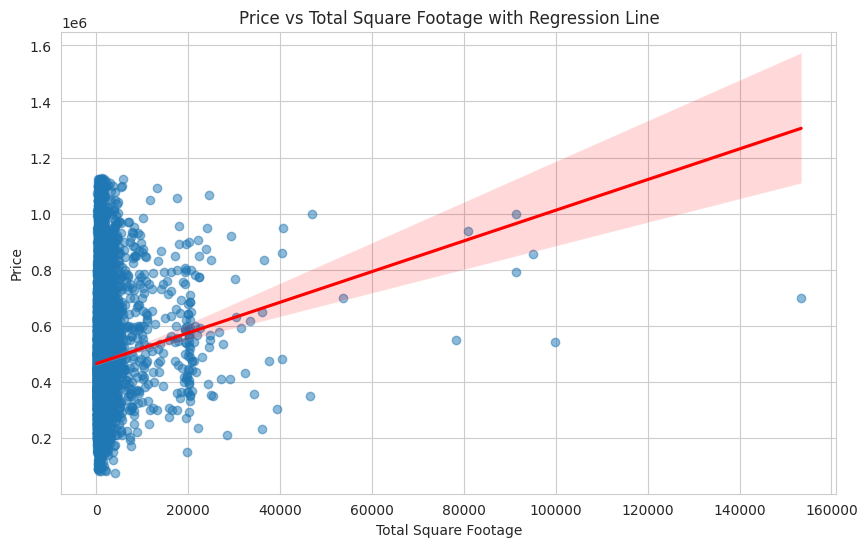

In [ ]:
# Scatterplot with Regression Line between Price and Total Square Footage
plt.figure(figsize=(10, 6))
sns.regplot(x='sqmt_total_m2', y='price', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Price vs Total Square Footage with Regression Line")
plt.xlabel("Total Square Footage")
plt.ylabel("Price")
plt.show()


# correlation between living area and living square foot

In [ ]:
# Compute correlation between sqft_living and living_area_sqft
corr3 = df[['sqmt_living_m2', 'living_area_sqmt_m2']].corr().iloc[0, 1]
print(f"Correlation between Living Square Footage and Living Area: {corr3:.2f}")

Correlation between Living Square Footage and Living Area: 0.72


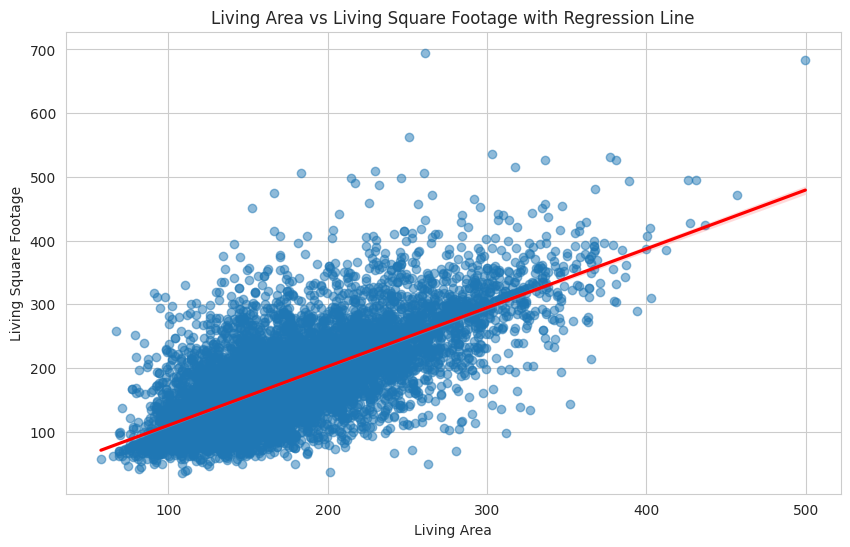

In [ ]:
# Scatterplot with Regression Line between Living Area and Square Footage
plt.figure(figsize=(10, 6))
sns.regplot(x='living_area_sqmt_m2', y='sqmt_living_m2', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Living Area vs Living Square Footage with Regression Line")
plt.xlabel("Living Area")
plt.ylabel("Living Square Footage")
plt.show()

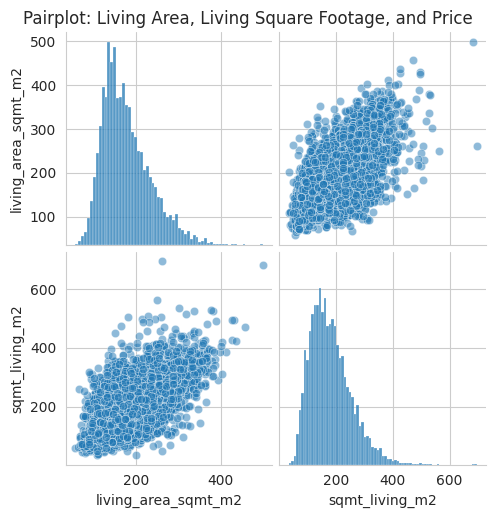

In [ ]:
# Pairplot to visualize relationships between living area, sqft_living,
sns.pairplot(df[['living_area_sqmt_m2', 'sqmt_living_m2', ]], kind='scatter', plot_kws={'alpha': 0.5})
plt.suptitle("Pairplot: Living Area, Living Square Footage, and Price", y=1.02)
plt.show()


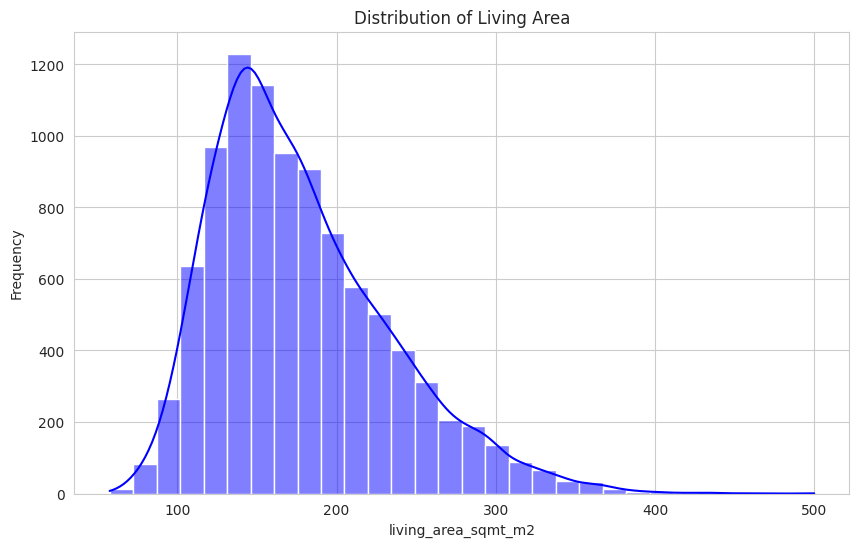

In [ ]:
#  distribution of Living Area
plt.figure(figsize=(10, 6))
sns.histplot(df['living_area_sqmt_m2'], kde=True, color='blue', bins=30)
plt.title("Distribution of Living Area")
plt.xlabel("living_area_sqmt_m2")
plt.ylabel("Frequency")
plt.show()

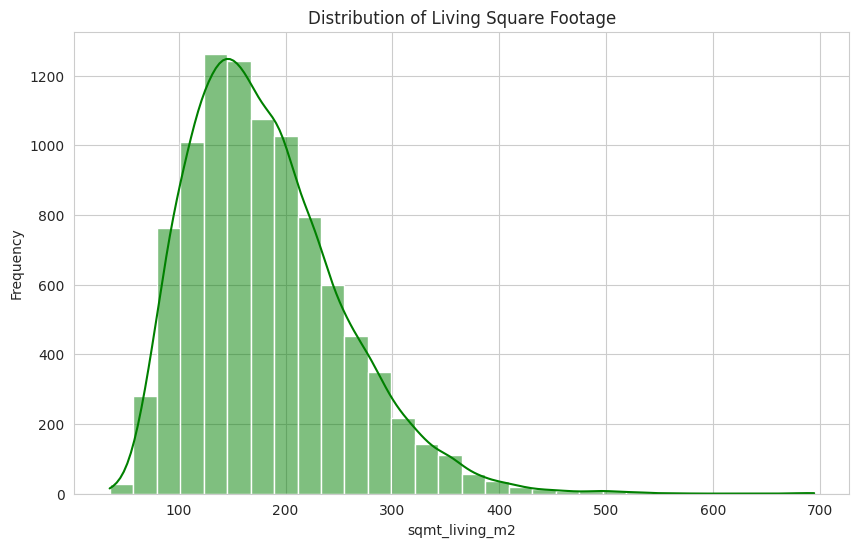

In [ ]:
#  distribution of Living Square Footage
plt.figure(figsize=(10, 6))
sns.histplot(df['sqmt_living_m2'], kde=True, color='green', bins=30)
plt.title("Distribution of Living Square Footage")
plt.xlabel("sqmt_living_m2")
plt.ylabel("Frequency")
plt.show()

Violin Plot to Compare Distributions by Price Category

In [ ]:
# Calculate the percentiles (33rd and 66th)
low_threshold = df['price'].quantile(0.33)
high_threshold = df['price'].quantile(0.66)

In [ ]:
# Create a new column 'price_category' based on these thresholds
df['price_category'] = pd.cut(df['price'], bins=[0, low_threshold, high_threshold, float('inf')],
                              labels=['Low', 'Medium', 'High'])


In [ ]:
df['price_category']

,price_category
0,Low
1,High
2,Low
3,High
4,Medium
...,...
9993,High
9995,Low
9996,Low
9997,High


In [ ]:
# Check the distribution of the new categories
a=print(df['price_category'].value_counts())


price_category
High      3211
Medium    3152
Low       3134
Name: count, dtype: int64


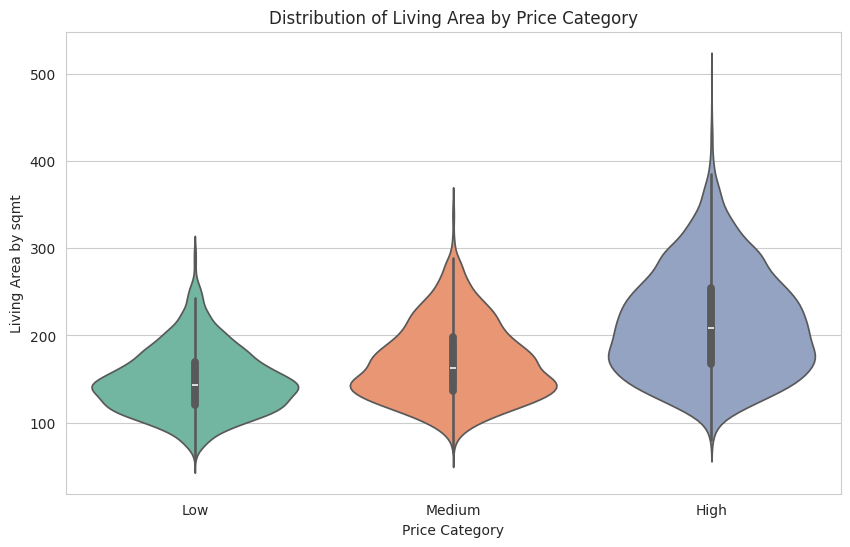

In [ ]:
# Violin plot to compare the distribution of living area by price category
plt.figure(figsize=(10, 6))
sns.violinplot(x='price_category', y='living_area_sqmt_m2', data=df, palette='Set2')
plt.title("Distribution of Living Area by Price Category")
plt.xlabel("Price Category")
plt.ylabel("Living Area by sqmt")
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9497 entries, 0 to 9998
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   price                9497 non-null   float64       
 1   bedrooms             9497 non-null   int64         
 2   bathrooms            9497 non-null   int64         
 3   floors               9497 non-null   int64         
 4   condition            9497 non-null   int64         
 5   grade                9497 non-null   int64         
 6   built                9497 non-null   datetime64[ns]
 7   renovated            9497 non-null   int64         
 8    renovated           380 non-null    datetime64[ns]
 9   sqmt_living_m2       9497 non-null   float64       
 10  sqmt_total_m2        9497 non-null   float64       
 11  living_area_sqmt_m2  9497 non-null   float64       
 12  log-price            9497 non-null   float64       
 13  price_sqrt           9497 non-null   f

# Basic analytics to help predict possible housing market trends in the future within Berlin

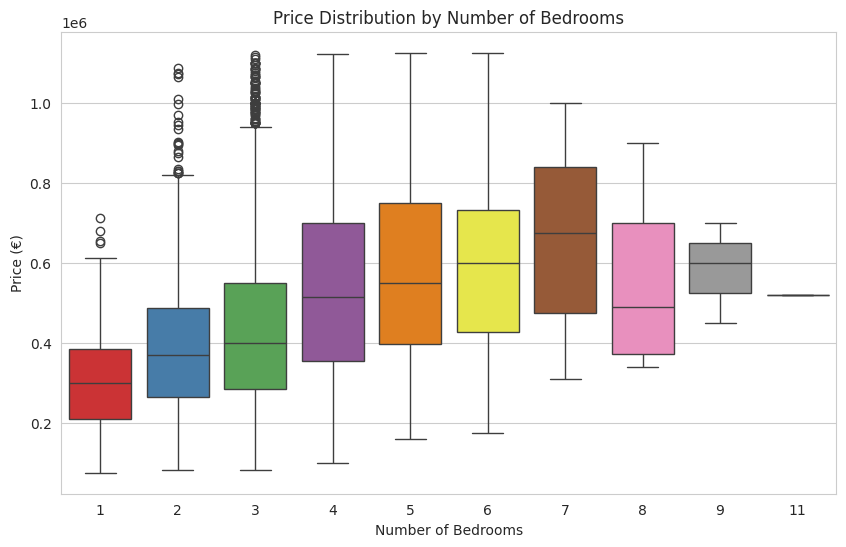

In [ ]:
# Box plot: Price by Number of Bedrooms
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='price', data=df, palette='Set1')
plt.title("Price Distribution by Number of Bedrooms")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price (€)")
plt.show()


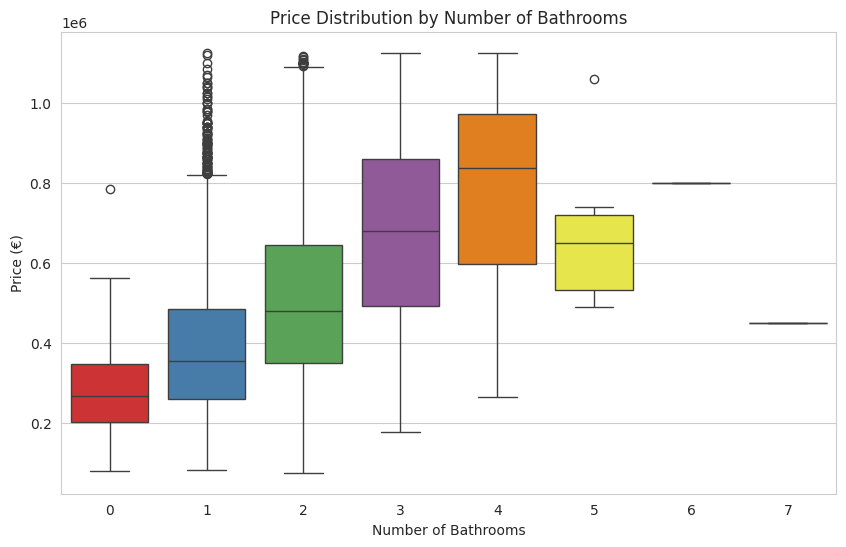

In [ ]:
# Box plot: Price by Number of Bathrooms
plt.figure(figsize=(10, 6))
sns.boxplot(x='bathrooms', y='price', data=df, palette='Set1')
plt.title("Price Distribution by Number of Bathrooms")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Price (€)")
plt.show()


# Examine Categorical Variables

In [ ]:
# helps to undeerstand how each category is distributed
categ_cols = ['bedrooms', 'bathrooms', 'floors', 'condition', 'grade',]

for col in categ_cols:
    print(f"{col} - Unique Values: {df[col].nunique()}")
    print(df[col].value_counts(), "\n")

bedrooms - Unique Values: 10
bedrooms
3     4511
4     2862
2     1263
5      609
6      128
1      101
7       14
8        5
9        3
11       1
Name: count, dtype: int64 

bathrooms - Unique Values: 8
bathrooms
2    4542
1    4143
3     684
4      82
0      38
5       6
6       1
7       1
Name: count, dtype: int64 

floors - Unique Values: 3
floors
1    6217
2    3120
3     160
Name: count, dtype: int64 

condition - Unique Values: 5
condition
3    5878
4    2724
5     797
2      86
1      12
Name: count, dtype: int64 

grade - Unique Values: 10
grade
7     4329
8     2630
6     1034
9      981
10     321
5      119
11      63
4       14
12       3
3        3
Name: count, dtype: int64 



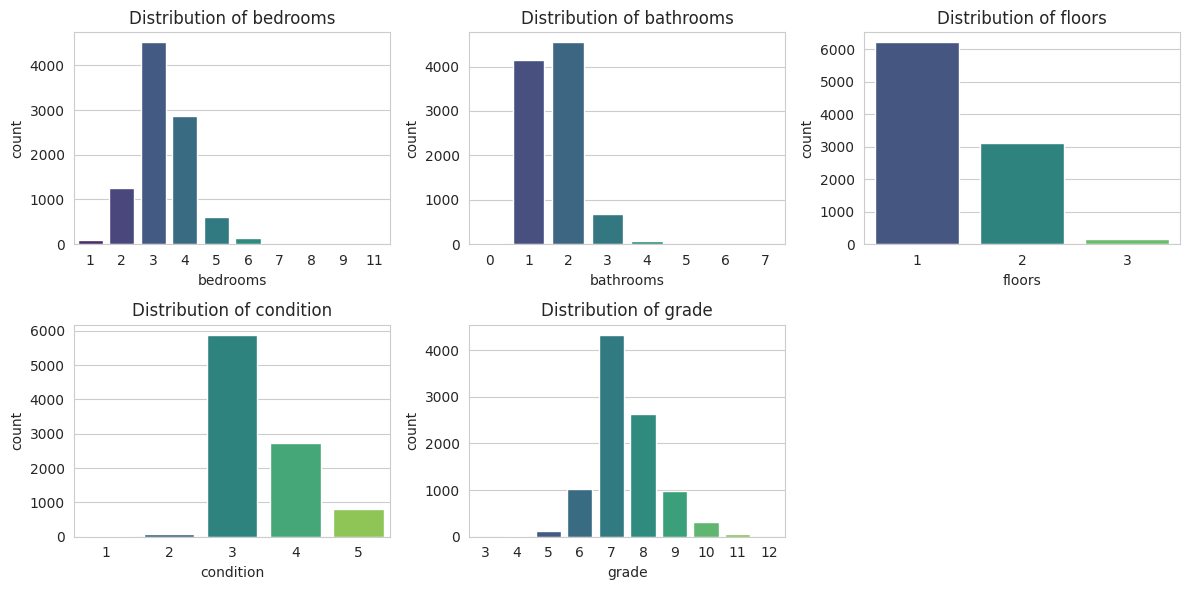

In [ ]:
# help to identify dominant categories

plt.figure(figsize=(12, 6))
for i, col in enumerate(categ_cols):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=df[col], palette="viridis")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

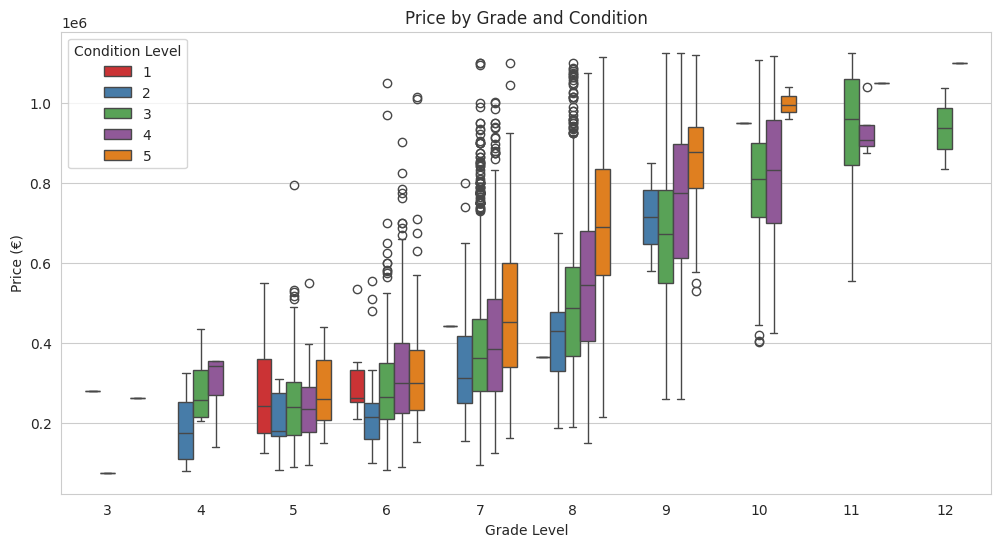

In [ ]:
# Price by Grade and Condition
plt.figure(figsize=(12, 6))
sns.boxplot(x='grade', y='price', hue='condition', data=df, palette='Set1')
plt.title("Price by Grade and Condition")
plt.xlabel("Grade Level")
plt.ylabel("Price (€)")
plt.legend(title='Condition Level')
plt.show()

In [ ]:
df.head(5)

,price,bedrooms,bathrooms,floors,condition,grade,built,renovated,renovated,sqmt_living_m2,sqmt_total_m2,living_area_sqmt_m2,log-price,price_sqrt,log_sqft_total,price_category
0,221900.0,3,1,1,3,7,1955-01-01,0,NaT,109.62554,524.901950,124.49002,12.309987,471.062629,6.265115,Low
1,538000.0,3,2,2,3,7,1951-01-01,1991,1991-01-01,238.76071,672.803526,157.00607,13.195616,733.484833,6.512939,High
2,180000.0,2,1,1,3,6,1933-01-01,0,NaT,71.53531,929.030000,252.69616,12.100718,424.264069,6.835217,Low
3,604000.0,4,3,1,5,7,1965-01-01,0,NaT,182.08988,464.515000,126.34808,13.311331,777.174369,6.143144,High
4,510000.0,3,2,1,3,8,1987-01-01,0,NaT,156.07704,750.656240,170.01249,13.142168,714.142843,6.622279,Medium


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9497 entries, 0 to 9998
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   price                9497 non-null   float64       
 1   bedrooms             9497 non-null   int64         
 2   bathrooms            9497 non-null   int64         
 3   floors               9497 non-null   int64         
 4   condition            9497 non-null   int64         
 5   grade                9497 non-null   int64         
 6   built                9497 non-null   datetime64[ns]
 7   renovated            9497 non-null   int64         
 8    renovated           380 non-null    datetime64[ns]
 9   sqmt_living_m2       9497 non-null   float64       
 10  sqmt_total_m2        9497 non-null   float64       
 11  living_area_sqmt_m2  9497 non-null   float64       
 12  log-price            9497 non-null   float64       
 13  price_sqrt           9497 non-null   f

In [ ]:
# Create a DataFrame from the correlation matrix, but only using numeric columns
correlation_df = pd.DataFrame(df.select_dtypes(include=np.number).corr())

In [ ]:
# Iterate through each column and create a table
for column in correlation_df.columns:
  print(f"Correlation Table for {column}:")
  print(correlation_df[column].sort_values(ascending=False))
  print("\n")

Correlation Table for price:
price                  1.000000
price_sqrt             0.992279
log-price              0.967199
grade                  0.621458
sqmt_living_m2         0.611894
living_area_sqmt_m2    0.564079
bathrooms              0.410940
bedrooms               0.294709
floors                 0.263005
log_sqft_total         0.117507
sqmt_total_m2          0.105972
renovated              0.088106
condition              0.055702
Name: price, dtype: float64


Correlation Table for bedrooms:
bedrooms               1.000000
sqmt_living_m2         0.589325
bathrooms              0.466234
living_area_sqmt_m2    0.357697
grade                  0.335224
log-price              0.299034
price_sqrt             0.298541
price                  0.294709
floors                 0.176347
log_sqft_total         0.147415
sqmt_total_m2          0.025268
condition              0.016255
renovated              0.004417
Name: bedrooms, dtype: float64


Correlation Table for bathrooms:
bathrooms  

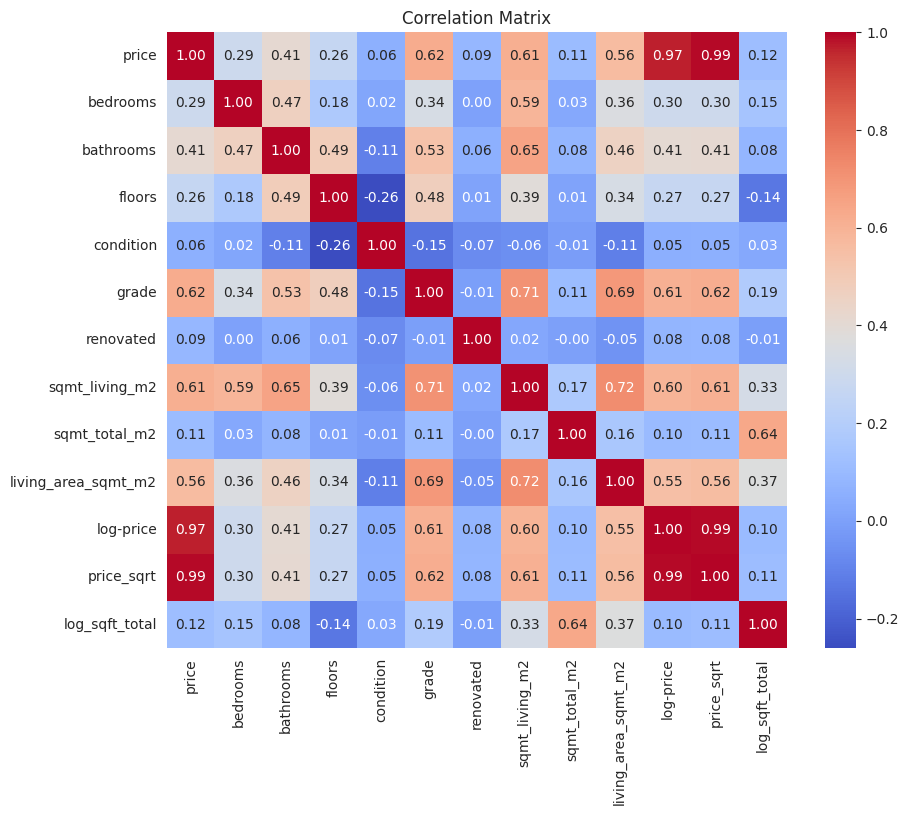

In [ ]:
# Plot the heatmap for visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt='.2f', )
plt.title("Correlation Matrix")
plt.show()

# Future Work

In [ ]:
# Calculate age of the property
df['age'] = pd.Timestamp.now().year - df['built'].dt.year


In [ ]:
# Calculate years since renovation (if renovated)
df['years_since_renovation'] = pd.Timestamp.now().year - pd.to_datetime(df['renovated'], errors='coerce').dt.year
df['years_since_renovation'] = df['years_since_renovation'].fillna(0)  # Fill missing values

In [ ]:
df['sqft_per_bedroom'] = df['sqmt_total_m2'] / df['bedrooms']
df['sqft_per_bedroom']

,sqft_per_bedroom
0,174.967317
1,224.267842
2,464.515000
3,116.128750
4,250.218747
...,...
9993,131.666777
9995,2185.264366
9996,296.639279
9997,110.322312


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9497 entries, 0 to 9998
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   price                   9497 non-null   float64       
 1   bedrooms                9497 non-null   int64         
 2   bathrooms               9497 non-null   int64         
 3   floors                  9497 non-null   int64         
 4   condition               9497 non-null   int64         
 5   grade                   9497 non-null   int64         
 6   built                   9497 non-null   datetime64[ns]
 7   renovated               9497 non-null   int64         
 8    renovated              380 non-null    datetime64[ns]
 9   sqmt_living_m2          9497 non-null   float64       
 10  sqmt_total_m2           9497 non-null   float64       
 11  living_area_sqmt_m2     9497 non-null   float64       
 12  log-price               9497 non-null   float64      

# reffernece



Allen B. Downey ,(2015).Think Python[online ]. second edition.link:https://pythonbooks.org/think-python-how-to-think-like-a-computer-scientist/

------


Arieh Iserles
,(April,2014).On skew-symmetric differentiation matrices [online ],University of Cambridge ,link : https://www.researchgate.net/publication/265800198_On_skew-symmetric_differentiation_matrices Accessed 28 Jan. 2025.


-------

Bernd Klein,   Data Analysis[online].python-course.eu .link:https://python-course.eu/books/bernd_klein_python_data_analysis_a4.pdf .Accessed 6 Feb. 2025.


-----



Data Normalization Machine Learning ,(Last Update:04 Nov, 2024), GeekforGeeks , link :https://www.geeksforgeeks.org/what-is-data-normalization/  Accessed 28 Jan. 2025.


------


Dennis T ,(Jul 25, 2019). Confusion Matrix Visualization [online]. Medium.com , link :https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea .
Accessed 7 Feb. 2025.


-------

Hatice Özbolat ,(oct 2,2024) . Advanced Libraries in Data Science: Matplotlib, Seaborn, Scikit-learn, and Deep Learning Tools[online] , Medium.com , link : https://haticeozbolat17.medium.com/advanced-data-science-libraries-matplotlib-seaborn-scikit-learn-74cc8ceed16c.
Accessed 1 Feb. 2025.

---------



Hunter,Dale , et.al (May 10, 2017),Matplotlib
[online ], second edition ,link:https://matplotlib.org/2.0.2/Matplotlib.pdf .Accessed 4 Feb. 2025.



-----



R. Praba ,(July,2021), Dr. N.G.P.Arts and Science College ,Study On Machine Learning Algorithms [onlin],Researchgate .liink: https://www.researchgate.net/publication/354306269_Study_On_Machine_Learning_Algorithms  Accessed 8 FEb. 2025.


------


Tutorials Point ,link:https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_with_python_tutorial.pdf Accessed 8 feb. 2025.


------

Violin Plot for Data Analysis.(Last Updated : 18 Feb, 2024) ,GeekforGeeks , link :https://www.geeksforgeeks.org/violin-plot-for-data-analysis/. Accessed 30 Jan. 2025.